In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)


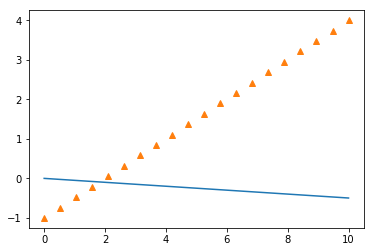

In [7]:
x_train =  np.linspace(0,10,20).reshape((20,1))
y_train = 0.5*x_train-1

input_dim = 1
output_dim = 1

#placeholders for our training points
x = tf.placeholder(tf.float32,[None, input_dim])
y = tf.placeholder(tf.float32,[None, output_dim])
# weights and bias
W = tf.Variable(tf.random_normal([input_dim, output_dim], stddev=0.1),name ='W')
b = tf.Variable(tf.zeros([output_dim]),name='b')
# model output
linear_model_pred = tf.matmul(x , W) + b


loss = tf.reduce_sum(tf.square(linear_model_pred - y))

#==================================================
#===================Adding Summery Nodes===========

variable_summaries(W)
variable_summaries(b)
variable_summaries(linear_model_pred)
merged = tf.summary.merge_all()

#==================================================
#==================================================

optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

init = tf.global_variables_initializer()

#run the initilizer
sess = tf.InteractiveSession()

#==================================================
#==================================================
train_writer = tf.summary.FileWriter('/home/mashal/Documents/TensorflowExamples/train',
                                      sess.graph)
#==================================================
#==================================================


sess.run(init)
    
y_hat = sess.run(linear_model_pred, feed_dict={x:x_train, y:y_train})
plt.plot(x_train,y_hat)    
plt.plot(x_train, y_train,'^')    
    


In [8]:
error_seq=[]
for i in range(10):
    summary, training_error, _ = sess.run([merged, loss, optimizer], feed_dict= {x:x_train, y:y_train})
    train_writer.add_summary(summary, i)
    
    error_seq += [training_error]
train_writer.close()
plt.plot(error_seq)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'Placeholder', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-1a955111b946>", line 8, in <module>
    x = tf.placeholder(tf.float32,[None, input_dim])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2148, in _placeholder
    name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2334, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


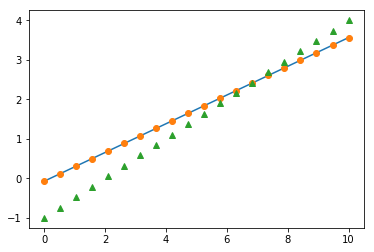

In [5]:
y_hat = sess.run(linear_model_pred,feed_dict= {x:x_train, y:y_train})
plt.plot(x_train, y_hat)    
plt.plot(x_train, y_hat,'o')    
plt.plot(x_train, y_train,'^')    
 

In [ ]:
tensorboard --logdir='/home/mashal/Documents/TensorflowExamples/train'